In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
os.getcwd()

'/users/PCS0268/luchinsky/CS4170_FA2022_Final_Luchinsky/analysis'

In [43]:
inA = np.loadtxt("../Default/in_hA.txt")
in_ev = np.sort(np.linalg.eig(inA)[0])
outA = np.loadtxt("../Default/out_hA.txt")
out_ev = np.sort(np.linalg.eig(outA)[0])
n = outA.shape[0]
print("n=", n)

n= 30


In [44]:
# comparing eigenvalues
c_ev = np.loadtxt("../Default/ev_out.txt")[:,1]
in_ev/c_ev

array([1.50764101, 1.226716  , 1.11816493, 0.99853625, 0.99611669,
       1.00175725, 1.00247338, 0.99460596, 0.99424703, 1.00563328,
       1.01261272, 1.00151785, 1.00264769, 1.18232276, 0.96574244,
       0.99060872, 1.00020579, 0.98778324, 1.00129415, 1.00724901,
       0.99363925, 1.00512812, 1.00318695, 1.00076763, 1.00349899,
       1.00258385, 0.99964378, 0.9982195 , 1.00236842, 2.48840343])

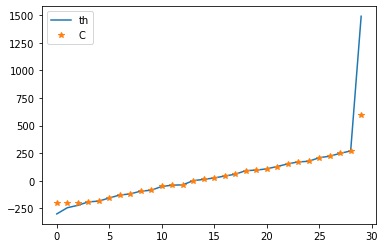

In [45]:
plt.plot(in_ev, label = "th")
plt.plot(c_ev, "*", label = "C")
plt.legend()

In [33]:
in_ev

array([-363.80237786, -334.37355917, -324.65955038, -299.08317561,
       -283.78012492, -276.46977973, -263.33305093, -251.01709117,
       -235.49416605, -222.7352392 , -194.76604744, -175.74283137,
       -160.60435836, -155.64470104, -151.55053559, -148.1980788 ,
       -124.59196157,  -96.09922312,  -88.55272759,  -75.36344245,
        -66.6404096 ,  -55.35898085,  -29.63084348,  -25.56431466,
         -8.44884108,   -5.77587651,   19.73961546,   45.11338989,
         54.97608155,   65.00236017,   70.87889285,   87.15708737,
        101.2469084 ,  118.29282115,  132.41298206,  135.19476401,
        141.54330096,  163.35353339,  173.72669833,  187.22337081,
        215.6437954 ,  226.25098729,  257.8502322 ,  266.09113927,
        271.57478282,  280.92940618,  314.42232302,  323.45786748,
        379.9598435 , 2552.23910496])

In [20]:
in_ev

array([-111.86682731,  -80.19007661,  -64.9540301 ,  -20.75114924,
         -5.35824799,   20.7043155 ,   46.48334569,   93.8199835 ,
        157.55283056,  520.55985601])

In [19]:

in_ev[0]

-111.86682731017271

In [10]:
np.sum(np.abs(1-in_ev/out_ev)**2)

5.6960019009925974e-11

In [11]:
UT = np.array([outA[i,j] for i in range(n-2) for j in range(i+2, n)])
np.allclose( 1+UT , 1, rtol=0.01)

True

In [13]:
in_ev

array([-111.86682731,  -80.19007661,  -64.9540301 ,  -20.75114924,
         -5.35824799,   20.7043155 ,   46.48334569,   93.8199835 ,
        157.55283056,  520.55985601])

In [14]:
np.sum(in_ev < 90)

7

In [6]:
res  = pd.read_csv("../Default/results.csv", sep=" ")
res

,N,p,time
0,10,1,0.001891
1,10,2,0.001527
2,10,3,0.001557
3,10,4,0.001613
4,10,5,0.002106
...,...,...,...
65,100,3,69.768115
66,100,4,53.718553
67,100,5,44.961242
68,100,10,23.937345


In [7]:
res["N"].unique()

array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100])

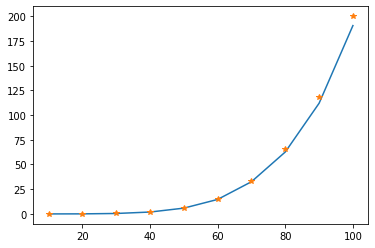

In [36]:
df1 = res.query("p==1")
Nlist = df1["N"].unique()
plt.plot(Nlist, df1["time"])
plt.plot(Nlist, 200*(Nlist/100)**5, "*")
# plt.yscale("log")
# plt.xscale("log")

In [43]:
def getStat(res, N):
    df = res.query("N=="+str(N))
    time = df["time"]
    serial = float(df.query("p==1")["time"])
    speedup = serial/df["time"]
    eff = speedup/df["p"]
    KF  = (1/speedup - 1/df["p"])/(1-1/df["p"])
    return df["p"], time, speedup, eff, KF

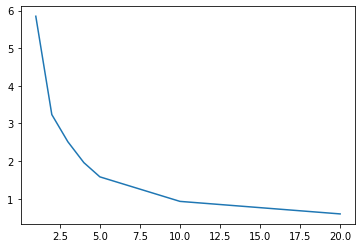

In [44]:
p, time, speedup, eff, KF  = getStat(res, N=50)
plt.plot(p, time)